In [26]:
# Import libraries

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [27]:
# Read data from csv file
df = pd.read_csv('final_batting_2023.csv')
df.head()
df.count()

POS       2341
Player    2341
Mat       2341
Inns      2341
NO        2341
Runs      2341
HS        2341
Avg       2341
BF        2341
SR        2341
100       2341
50        2341
4s        2341
6s        2341
year      2341
dtype: int64

In [28]:
## Droppig the rows with values less than 100

df = df.drop(df[df["BF"]<200].index)
df.count()

POS       443
Player    443
Mat       443
Inns      443
NO        443
Runs      443
HS        443
Avg       443
BF        443
SR        443
100       443
50        443
4s        443
6s        443
year      443
dtype: int64

In [29]:
df.head()

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s,year
0,1,Shubman GillGT,17,17,2,890,129,59.33,564,157.80,3,4,85,33,2023
1,2,Faf Du PlessisRCB,14,14,1,730,84,56.15,475,153.68,0,8,60,36,2023
2,3,Devon ConwayCSK,16,15,2,672,92*,51.69,481,139.70,0,6,77,18,2023
3,4,Virat KohliRCB,14,14,2,639,101*,53.25,457,139.82,2,6,65,16,2023
4,5,Yashasvi JaiswalRR,14,14,1,625,124,48.08,382,163.61,1,5,82,26,2023


In [30]:
# Clustering is to be based on the two columns: Strike rate and average
# Selecting the two columns

X = df[["SR","Avg"]].values


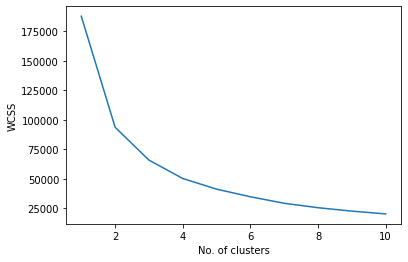

In [31]:
# Using the elbow method to find the optimal number of clusters

WCSS = []

for i in range(1,11):
    kmeans = KMeans(n_init=10,n_clusters=i)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.plot(range(1,11),WCSS)
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

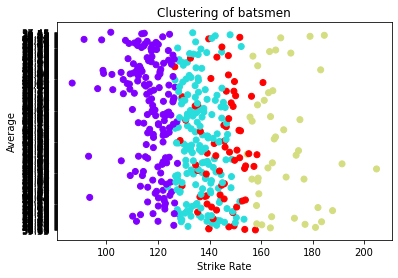

In [35]:
kmeans=KMeans(n_clusters=4)
y_kmeans=kmeans.fit(X)
# Plotting half of the data
plt.scatter(X[:,0],X[:,1],c=y_kmeans.labels_,cmap='rainbow')
plt.xlabel("Strike Rate")
plt.ylabel("Average")
plt.title("Clustering of batsmen")
plt.show()
